In [1]:
pip install matplotlib pandas seaborn scipy numpy matplotlib-venn 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=fcfe8a3e4881220a445378144a5b3afabe02c1e947a370bd6b1b0b29ab2dc132
  Stored in directory: /Users/hubert/Library/Caches/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [2]:
# @title
# Première cellule de code : Import des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
# Pour le diagramme de Venn à 3 ensembles
from matplotlib_venn import venn3, venn3_circles

# Pour afficher les graphiques dans le notebook
%matplotlib inline


# Probabilistic Analysis of an Epidemic in a City with 3 Neighborhoods

## Problem Statement

An epidemic has broken out in a city of 10,000 inhabitants divided into three distinct neighborhoods. Health authorities conducted a testing campaign and collected the following data:

| Neighborhood | Population | Number of Infected |
|:------------:|:----------:|:------------------:|
| $Q_1$        | 3000       | 300                |
| $Q_2$        | 4000       | 800                |
| $Q_3$        | 3000       | 1200               |
| **Total**    | **10,000** | **2300**           |

## Formalization Using Set Theory

Let us formalize the problem using set theory:

- Let $\Omega$ be the set of all city inhabitants, with $|\Omega| = 10,000$.
- For each $i \in \{1, 2, 3\}$, let $Q_i \subset \Omega$ be the set of inhabitants in neighborhood $i$.
- Let $I \subset \Omega$ be the set of infected inhabitants.

The sets $Q_i$ form a partition of $\Omega$, meaning:
1. $\bigcup_{i=1}^{3} Q_i = \Omega$ (complete coverage)
2. $Q_i \cap Q_j = \emptyset$ for all $i \neq j$ (pairwise disjoint)

Cardinalities:
- $|Q_1| = 3000$, $|Q_2| = 4000$, $|Q_3| = 3000$
- $|I| = 2300$

Infection intersections:
- $|I \cap Q_1| = 300$
- $|I \cap Q_2| = 800$
- $|I \cap Q_3| = 1200$

Verification:  
$|I \cap Q_1| + |I \cap Q_2| + |I \cap Q_3| = 300 + 800 + 1200 = 2300 = |I|$

## Question 1: Determine the probability that a randomly selected inhabitant belongs to each neighborhood.

In probability theory based on sets, the probability of event $A$ is defined as $P(A) = \frac{|A|}{|\Omega|}$.

For each neighborhood $Q_i$:

- $P(Q_1) = \frac{|Q_1|}{|\Omega|} = \frac{3000}{10000} = 0.3$ (30% of the population)
- $P(Q_2) = \frac{|Q_2|}{|\Omega|} = \frac{4000}{10000} = 0.4$ (40% of the population)
- $P(Q_3) = \frac{|Q_3|}{|\Omega|} = \frac{3000}{10000} = 0.3$ (30% of the population)

These probabilities form a complete probability distribution over $\Omega$ because:
- $\forall i, P(Q_i) \geq 0$
- $\sum_{i=1}^{3} P(Q_i) = 0.3 + 0.4 + 0.3 = 1$

This property directly follows from $\{Q_1, Q_2, Q_3\}$ being a partition of $\Omega$.

## Question 2: Calculate the conditional probability of infection for each neighborhood.

The conditional probability $P(A|B)$ is defined in set theory terms as:

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{|A \cap B|}{|B|}$$

For infection probability in each neighborhood $P(I|Q_i)$:

- $P(I|Q_1) = \frac{|I \cap Q_1|}{|Q_1|} = \frac{300}{3000} = 0.10$ (10%)
- $P(I|Q_2) = \frac{|I \cap Q_2|}{|Q_2|} = \frac{800}{4000} = 0.20$ (20%)
- $P(I|Q_3) = \frac{|I \cap Q_3|}{|Q_3|} = \frac{1200}{3000} = 0.40$ (40%)

Visualization insights:  
- $\Omega$ is partitioned into three disjoint subsets $Q_1$, $Q_2$, and $Q_3$
- Set $I$ intersects each subset with different proportions
- $\frac{|I \cap Q_i|}{|Q_i|}$ represents the infection rate in neighborhood $i$

These conditional probabilities reveal non-uniform infection risk across the city. Defining the relative risk of neighborhood $i$ versus $j$ as $\frac{P(I|Q_i)}{P(I|Q_j)}$:

- Relative risk $Q_3/Q_1 = \frac{0.40}{0.10} = 4$ (4× higher risk in $Q_3$ vs $Q_1$)
- Relative risk $Q_3/Q_2 = \frac{0.40}{0.20} = 2$ (2× higher risk in $Q_3$ vs $Q_2$)
- Relative risk $Q_2/Q_1 = \frac{0.20}{0.10} = 2$ (2× higher risk in $Q_2$ vs $Q_1$)

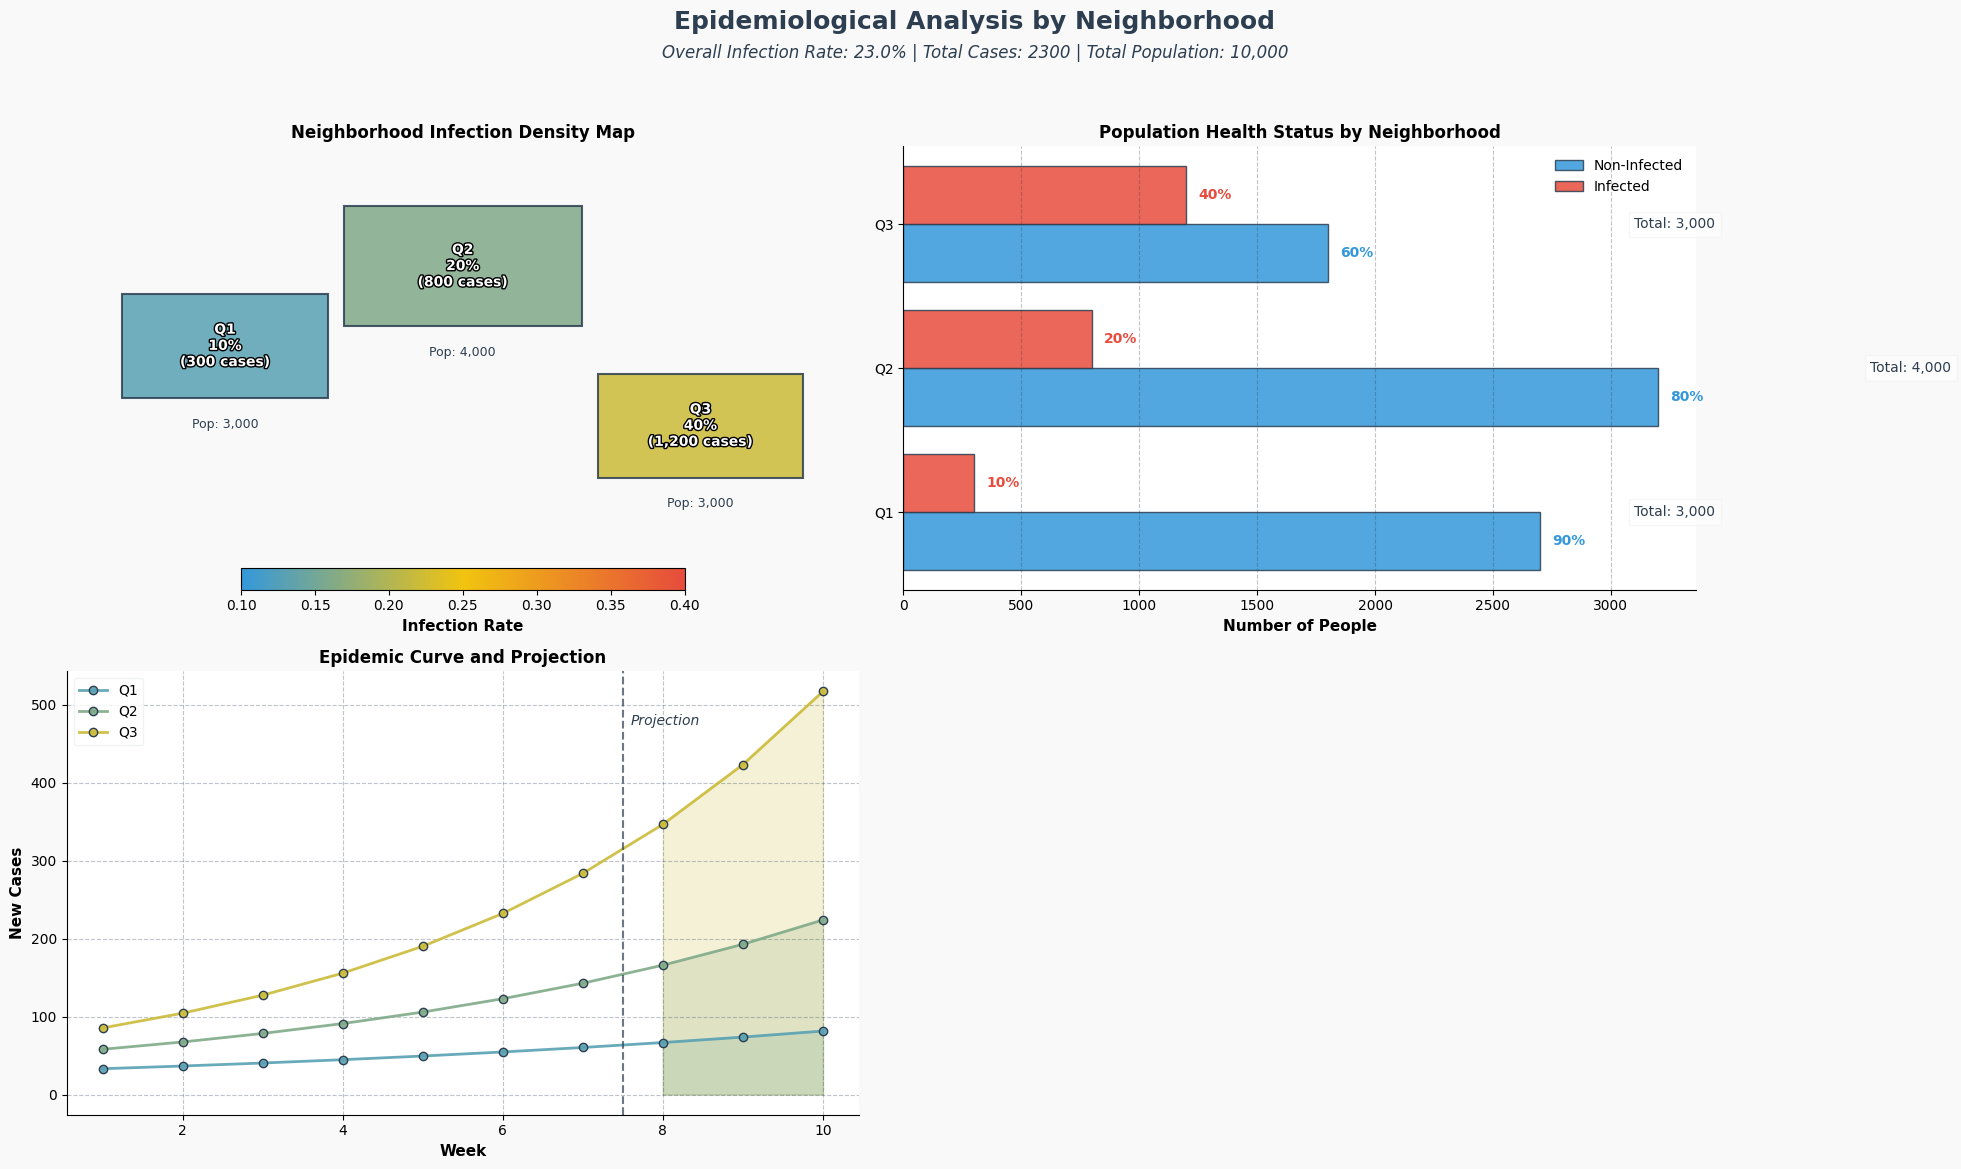

In [5]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import matplotlib.patheffects as pe
from matplotlib.gridspec import GridSpec

# Problem data definition
neighborhoods = ['Q1', 'Q2', 'Q3']
population = [3000, 4000, 3000]
infected = [300, 800, 1200]
non_infected = [2700, 3200, 1800]
infection_rates = [0.10, 0.20, 0.40]

# Enhanced color palette with better semantic meaning
main_colors = {
    'healthy': '#3498db',        # Blue for non-infected
    'infected': '#e74c3c',       # Red for infected
    'background': '#f9f9f9',     # Light background
    'highlight': '#2c3e50',      # Dark text/borders
    'grid': '#ecf0f1',           # Light grid lines
    'accent': '#f39c12'          # Orange accent color
}

# Set global style parameters
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'axes.titleweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': main_colors['background']
})

# Create figure with custom grid layout for better proportion
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(2, 4, figure=fig)

# Title with more precise information
fig.suptitle('Epidemiological Analysis by Neighborhood',
             fontsize=18,
             fontweight='bold',
             y=0.98,
             color=main_colors['highlight'])

# Add a subtitle with key metrics
total_infected = sum(infected)
total_pop = sum(population)
overall_rate = total_infected / total_pop
fig.text(0.5, 0.94,
         f'Overall Infection Rate: {overall_rate:.1%} | Total Cases: {total_infected} | Total Population: {total_pop:,}',
         ha='center',
         fontsize=12,
         color=main_colors['highlight'],
         style='italic')

# 1. CARTOGRAPHIC VISUALIZATION - Simulate neighborhood map with infection density
ax1 = fig.add_subplot(gs[0, :2])
ax1.set_title('Neighborhood Infection Density Map', fontweight='bold')

# Create a simple simulated map (using rectangles with different sizes)
neighborhood_positions = [(0.2, 0.5), (0.5, 0.7), (0.8, 0.3)]  # x, y positions
neighborhood_sizes = [np.sqrt(p/1000) * 0.15 for p in population]  # Size proportional to population

# Define infection density colormap (from blue to red)
infection_cmap = LinearSegmentedColormap.from_list(
    'infection_density',
    [main_colors['healthy'], '#f1c40f', main_colors['infected']]
)

# Draw each neighborhood as a "district" on the map
for i, (pos, size, rate, name, pop, inf) in enumerate(zip(
    neighborhood_positions, neighborhood_sizes, infection_rates,
    neighborhoods, population, infected)):

    # Draw district with color based on infection rate
    district = plt.Rectangle(
        (pos[0]-size/2, pos[1]-size/2),
        size, size,
        facecolor=infection_cmap(rate),
        edgecolor=main_colors['highlight'],
        linewidth=1.5,
        alpha=0.85
    )
    ax1.add_patch(district)

    # Add district label
    ax1.text(
        pos[0], pos[1],
        f"{name}\n{rate:.0%}\n({inf:,} cases)",
        ha='center', va='center',
        fontweight='bold',
        color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground='black')]
    )

    # Add population size indicator
    ax1.text(
        pos[0], pos[1]-size/2-0.05,
        f"Pop: {pop:,}",
        ha='center', va='top',
        fontsize=9,
        color=main_colors['highlight']
    )

# Add a legend/scale for infection rates
sm = plt.cm.ScalarMappable(cmap=infection_cmap)
sm.set_array(infection_rates)
cbar = plt.colorbar(sm, ax=ax1, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Infection Rate', fontweight='bold')

# Remove axes
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 2. DEMOGRAPHIC PYRAMID - Infected vs Non-Infected Population
ax2 = fig.add_subplot(gs[0, 2:])
ax2.set_title('Population Health Status by Neighborhood', fontweight='bold')

# Create horizontal bars showing infected vs non-infected
y_pos = np.arange(len(neighborhoods))
bar_height = 0.4

# Non-infected bars (left side)
ax2.barh(y_pos - bar_height/2, non_infected, height=bar_height,
         color=main_colors['healthy'], alpha=0.85, edgecolor=main_colors['highlight'],
         label='Non-Infected')

# Infected bars (right side, negative width to go left)
ax2.barh(y_pos + bar_height/2, infected, height=bar_height,
         color=main_colors['infected'], alpha=0.85, edgecolor=main_colors['highlight'],
         label='Infected')

# Add percentage labels
for i, (inf, pop) in enumerate(zip(infected, population)):
    percentage = inf/pop
    ax2.text(
        inf+50, i + bar_height/2,
        f"{percentage:.0%}",
        va='center',
        fontweight='bold',
        color=main_colors['infected']
    )
    ax2.text(
        non_infected[i]+50, i - bar_height/2,
        f"{(1-percentage):.0%}",
        va='center',
        fontweight='bold',
        color=main_colors['healthy']
    )

# Format the graph
ax2.set_yticks(y_pos)
ax2.set_yticklabels(neighborhoods)
ax2.set_xlabel('Number of People', fontweight='bold')
ax2.grid(axis='x', linestyle='--', alpha=0.3, color=main_colors['highlight'])
ax2.legend(frameon=False, loc='upper right')

# Add total population annotation
for i, pop in enumerate(population):
    ax2.text(
        pop+100, i,
        f"Total: {pop:,}",
        va='center',
        color=main_colors['highlight'],
        bbox=dict(facecolor='white', alpha=0.5, edgecolor=main_colors['grid'])
    )

# 3. TIME SERIES - Simulated epidemic curve with projection
ax3 = fig.add_subplot(gs[1, :2])
ax3.set_title('Epidemic Curve and Projection', fontweight='bold')

# Simulate weekly data for a 10-week period
weeks = np.arange(1, 11)
weekly_cases = {
    'Q1': 30 * np.exp(0.1 * weeks),
    'Q2': 50 * np.exp(0.15 * weeks),
    'Q3': 70 * np.exp(0.2 * weeks)
}

# Plot each neighborhood's curve
for i, name in enumerate(neighborhoods):
    ax3.plot(
        weeks, weekly_cases[name],
        marker='o',
        linewidth=2,
        label=name,
        color=to_rgba(infection_cmap(infection_rates[i]), 0.9),
        markeredgecolor=main_colors['highlight'],
        markeredgewidth=1
    )

# Add projection area (last 3 weeks)
for i, name in enumerate(neighborhoods):
    ax3.fill_between(
        weeks[7:],
        weekly_cases[name][7:],
        alpha=0.2,
        color=to_rgba(infection_cmap(infection_rates[i]), 0.5)
    )

# Add a vertical line separating actual from projected
ax3.axvline(x=7.5, color=main_colors['highlight'], linestyle='--', alpha=0.7)
ax3.text(7.6, ax3.get_ylim()[1]*0.9, 'Projection',
         va='top', color=main_colors['highlight'], style='italic')

# Format the graph
ax3.set_xlabel('Week', fontweight='bold')
ax3.set_ylabel('New Cases', fontweight='bold')
ax3.grid(linestyle='--', alpha=0.3, color=main_colors['highlight'])
ax3.legend(frameon=True, facecolor='white', edgecolor=main_colors['grid'])


# Create a more comprehensive risk matrix
risk_data = np.array([
    infection_rates,                                      # Current infection rate
    [r*1.2 if i < 2 else r*0.9 for i, r in enumerate(infection_rates)],  # Projected rate
    [r/overall_rate for r in infection_rates]             # Relative risk
]).T

# Custom annotation function
def format_annotation(val, i, j):
    if j == 2:  # Relative risk column
        return f"{val:.1f}x"
    else:  # Percentage columns
        return f"{val:.0%}"






# Simulated vaccination data
vax_coverage = [0.65, 0.48, 0.37]  # Higher in Q1, lower in high-infection areas
vax_target = 0.7  # Target vaccination rate

# Create donut charts for vaccination coverage
for i, (name, rate, coverage) in enumerate(zip(neighborhoods, infection_rates, vax_coverage)):
    # Calculate position in grid
    y_pos = 0.8 - i * 0.35

   



# Final formatting
plt.tight_layout(rect=[0.01, 0.01, 0.99, 0.93])
plt.savefig('enhanced_epidemiological_report.png', dpi=300, bbox_inches='tight')
plt.show()

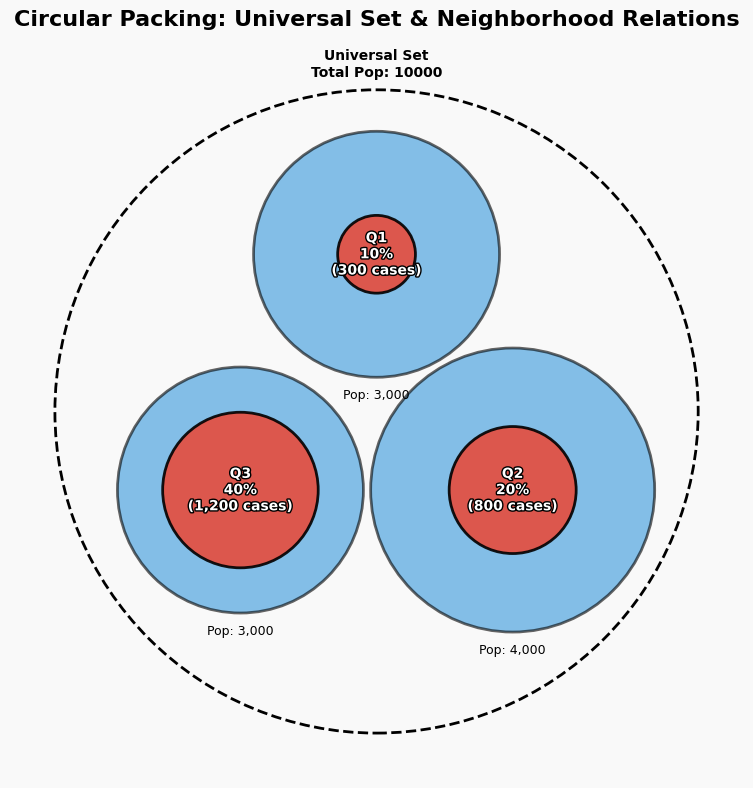

In [7]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe
from matplotlib.colors import to_rgba
from math import sqrt, cos, sin, pi

# --- Data ---
neighborhoods = ['Q1', 'Q2', 'Q3']
population = [3000, 4000, 3000]
infected = [300, 800, 1200]
non_infected = [2700, 3200, 1800]
infection_rates = [0.10, 0.20, 0.40]

# Scaling factor to convert population to circle radius
scale = 0.1  # adjust as needed

# Compute radii for each neighborhood and infected subset
radii_neigh = [scale * sqrt(p) for p in population]
radii_infected = [scale * sqrt(i) for i in infected]

# --- Define positions for neighborhood circles ---
# We'll arrange the three neighborhoods on a circle using angles (e.g. 90°, -30°, -150°)
angles = [pi/2, -pi/6, -5*pi/6]
# Choose a distance from the universal center such that circles are well within the universal set.
d = 7  # distance from center for each neighborhood
positions = [(d * cos(theta), d * sin(theta)) for theta in angles]

# --- Define universal set ---
total_pop = sum(population)
univ_radius = d + max(radii_neigh) + 1  # a bit larger than the furthest neighborhood

# --- Plot Circular Packing ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Draw universal set circle
univ_circle = plt.Circle((0, 0), univ_radius, edgecolor='black', facecolor='none', linewidth=2, linestyle='--')
ax.add_patch(univ_circle)
ax.text(0, univ_radius + 0.5, f"Universal Set\nTotal Pop: {total_pop}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Draw each neighborhood circle and its infected subset
for i, (name, pos, r_neigh, r_inf, inf, pop) in enumerate(zip(neighborhoods, positions, radii_neigh, radii_infected, infected, population)):
    # Neighborhood circle (non-infected background)
    neigh_circle = plt.Circle(pos, r_neigh, edgecolor='black', facecolor='#3498db', alpha=0.6, linewidth=2)
    ax.add_patch(neigh_circle)

    # Draw infected subset circle on top (centered within neighborhood circle)
    inf_circle = plt.Circle(pos, r_inf, edgecolor='black', facecolor='#e74c3c', alpha=0.9, linewidth=2)
    ax.add_patch(inf_circle)

    # Add label for neighborhood
    ax.text(pos[0], pos[1], f"{name}\n{inf/pop:.0%}\n({inf:,} cases)", ha='center', va='center',
            fontweight='bold', color='white',
            path_effects=[pe.withStroke(linewidth=2, foreground='black')])

    # Annotate total population for neighborhood (positioned below)
    ax.text(pos[0], pos[1]-r_neigh-0.5, f"Pop: {pop:,}", ha='center', va='top', fontsize=9, color='black')

# Set plot limits so all circles are visible
margin = 2
ax.set_xlim(-univ_radius-margin, univ_radius+margin)
ax.set_ylim(-univ_radius-margin, univ_radius+margin)

# Add title
plt.suptitle("Circular Packing: Universal Set & Neighborhood Relations", fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.show()
